# 12.2 案例实战 - 人脸识别模型

# 12.2.2 人脸数据读取、处理与变量提取

1.读取人脸照片数据

In [2]:
import os
names = os.listdir('olivettifaces')

names[0:5]  # 查看前5项读取的文件名

['10_0.jpg', '10_1.jpg', '10_2.jpg', '10_3.jpg', '10_4.jpg']

In [3]:
# 获取到文件名称后，便可以通过如下代码在Python中查看这些图片
from PIL import Image
img0 = Image.open('olivettifaces\\' + names[0])
img0.show()

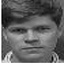

In [5]:
img0  # 在Jupyter Notebook中可以直接输入变量名查看图像

2.人脸数据处理 - 特征变量提取

In [6]:
# 图像灰度处理及数值化处理
import numpy as np
img0 = img0.convert('L')
img0 = img0.resize((32, 32))
arr = np.array(img0)

arr  # 查看数值化后的结果

array([[133, 100,  67, ...,  95, 106, 107],
       [169,  78,  66, ...,  79, 106, 102],
       [142,  73,  90, ...,  83,  97, 102],
       ...,
       [164, 105, 225, ...,  82,  73,  56],
       [205, 220, 204, ..., 134, 142, 124],
       [255, 254, 255, ..., 255, 252, 255]], dtype=uint8)

In [7]:
# 如果觉得numpy格式的arr不好观察，则可以通过pandas库将其转为DataFrame格式进行观察
import pandas as pd
pd.DataFrame(arr)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,133,100,67,81,100,83,67,68,91,107,...,67,80,76,79,87,81,99,95,106,107
1,169,78,66,92,101,93,113,107,79,72,...,43,53,61,85,56,86,84,79,106,102
2,142,73,90,84,110,103,115,111,116,109,...,43,50,49,79,61,76,86,83,97,102
3,142,75,59,76,73,105,121,120,108,107,...,40,40,29,46,39,61,62,78,81,110
4,123,49,37,52,49,56,73,96,106,103,...,41,38,28,31,46,39,83,45,57,109
5,120,46,42,53,47,56,56,55,50,60,...,35,31,33,34,38,53,72,50,39,111
6,119,40,34,41,40,70,93,104,87,69,...,31,39,38,33,41,55,60,66,44,115
7,115,32,32,38,44,59,78,99,109,109,...,67,76,70,54,59,59,47,44,52,106
8,114,30,30,27,20,33,44,57,68,75,...,115,106,89,57,36,34,39,39,85,102
9,116,28,17,37,33,31,37,44,43,39,...,127,117,101,69,36,28,31,39,85,92


In [11]:
# 上面获得的32*32的二维数组，还不利于数据建模，所以我们还需要通过reshape(1, -1)方法将其转换成一行(若reshape(-1,1)则转为一列），也即1*1024格式
arr = arr.reshape(1, -1)

print(arr)  # 查看转换后的结果，这一行数就是代表那张人脸图片了，其共有32*32=1024列数

[[133 100  67 ... 255 252 255]]


因为总共有400张照片需要处理，若将400个二维数组堆叠起来会形成三维数组，因为我们需要使用flatten()函数将1*1024的二维数组降维成一维数组，并通过tolist()函数将其转为列表方便之后和其他图片的颜色数值信息一起处理。

In [10]:
print(arr.flatten().tolist())  # 下面这一行数就是那张人脸转换后的结果了

[133, 100, 67, 81, 100, 83, 67, 68, 91, 107, 107, 86, 55, 60, 48, 61, 42, 59, 48, 39, 66, 76, 67, 80, 76, 79, 87, 81, 99, 95, 106, 107, 169, 78, 66, 92, 101, 93, 113, 107, 79, 72, 78, 98, 90, 66, 69, 53, 54, 45, 37, 33, 62, 57, 43, 53, 61, 85, 56, 86, 84, 79, 106, 102, 142, 73, 90, 84, 110, 103, 115, 111, 116, 109, 101, 112, 95, 95, 72, 62, 52, 52, 52, 45, 37, 33, 43, 50, 49, 79, 61, 76, 86, 83, 97, 102, 142, 75, 59, 76, 73, 105, 121, 120, 108, 107, 96, 109, 78, 59, 81, 69, 64, 50, 57, 52, 55, 45, 40, 40, 29, 46, 39, 61, 62, 78, 81, 110, 123, 49, 37, 52, 49, 56, 73, 96, 106, 103, 88, 82, 103, 91, 70, 61, 62, 62, 58, 51, 56, 49, 41, 38, 28, 31, 46, 39, 83, 45, 57, 109, 120, 46, 42, 53, 47, 56, 56, 55, 50, 60, 73, 81, 98, 89, 69, 84, 75, 76, 62, 54, 57, 51, 35, 31, 33, 34, 38, 53, 72, 50, 39, 111, 119, 40, 34, 41, 40, 70, 93, 104, 87, 69, 72, 59, 56, 53, 41, 38, 66, 46, 43, 52, 39, 24, 31, 39, 38, 33, 41, 55, 60, 66, 44, 115, 115, 32, 32, 38, 44, 59, 78, 99, 109, 109, 106, 79, 74, 60, 41

In [12]:
# 构造所有图片的特征变量
X = []  # 特征变量
for i in names:
    img = Image.open('olivettifaces\\' + i)
    img = img.convert('L')
    img = img.resize((32, 32))
    arr = np.array(img)
    X.append(arr.reshape(1, -1).flatten().tolist())

In [16]:
import pandas as pd
X = pd.DataFrame(X)

X  # 查看400张图片转换后的结果

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,133,100,67,81,100,83,67,68,91,107,...,255,255,255,253,255,255,255,255,252,255
1,157,94,93,97,93,110,107,65,69,89,...,253,254,255,254,252,253,255,255,254,255
2,152,99,93,90,66,102,76,70,71,104,...,253,254,255,254,255,253,255,255,255,255
3,151,94,94,86,103,58,58,79,59,74,...,255,255,255,255,253,254,255,255,254,255
4,147,72,34,61,43,52,46,76,57,92,...,254,255,254,254,252,254,255,254,254,255
5,133,57,71,76,69,65,56,54,40,33,...,255,255,255,255,255,255,255,255,254,255
6,159,96,112,87,52,50,41,45,55,71,...,255,255,254,255,253,254,255,255,255,254
7,158,98,98,76,72,89,66,74,41,91,...,253,255,253,254,255,255,255,254,255,255
8,111,41,39,24,54,63,63,57,54,60,...,254,254,255,255,255,254,255,254,254,255
9,148,94,96,87,86,97,111,81,67,58,...,254,251,255,254,254,255,254,255,255,255


In [15]:
print(X.shape)  # 查看此时的表格结构

(400, 1024)


3.人脸数据处理 - 目标变量提取

In [17]:
# 获取目标变量y：第一张图片演示
print(int(names[0].split('_')[0]))

10


In [20]:
# 批量获取所有图片的目标变量y
y = []  # 目标变量
for i in names:
    img = Image.open('olivettifaces\\' + i)
    y.append(int(i.split('_')[0]))
    
print(y)  # 查看目标变量,也就是对应的人员编号

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,

# 12.2.3 数据划分与降维

1.划分训练集和测试集

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

2.PCA数据降维

In [46]:
# 数据降维模型训练
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [47]:
# 对训练集和测试集进行数据降维
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [48]:
# 我们通过如下代码验证PCA是否降维：
print(X_train_pca.shape)
print(X_test_pca.shape)

(320, 100)
(80, 100)


In [49]:
# 如果想查看此时降维后的X_train_pca和X_test_pca，可以直接将它们打印出来查看，也可以将它们转为DataFrame格式进行查看，代码如下：
# pd.DataFrame(X_train_pca).head()
# pd.DataFrame(X_test_pca).head()

In [50]:
# 在PCA后面加个“？”运行可以可以看看官方的一些提示
# PCA?

# 12.2.4 模型的搭建与使用

1.模型搭建

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()  # 建立KNN模型  
knn.fit(X_train_pca, y_train)  # 用降维后的训练集进行训练模型

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

2.模型预测

In [52]:
y_pred = knn.predict(X_test_pca)  # 用降维后的测试集进行测试
print(y_pred)  # 将对测试集的预测结果打印出来

[ 9 21  3 40 26  4 28 37 12 36 26  7 27 21  3 24  7  2 17 30 21 32  8  2
 11 19  6 29  6 29 18 10 25 35 10 18 15  5  9 22 34 29  2 16  8 18  8 38
 39 35 16 30 30 11 37 36 35 20 33  6  1 16 31 32  5 30 21 39 35 39  2 19
  5  8 11  4 14 27 22 30]


In [53]:
# 通过和之前章节类似的代码，我们可以将预测值和实际值进行对比：
import pandas as pd
a = pd.DataFrame()  # 创建一个空DataFrame 
a['预测值'] = list(y_pred)
a['实际值'] = list(y_test)

a.head()  # 查看表格前5行

,预测值,实际值
0,9,9
1,21,21
2,3,3
3,40,40
4,26,26


In [54]:
# 查看预测准确度 - 方法1
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.925


In [55]:
# 查看预测准确度 - 方法2
score = knn.score(X_test_pca, y_test)
print(score)

0.925


3.模型对比（数据降维与不降维）

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()  # 建立KNN模型  
knn.fit(X_train, y_train)  # 不使用数据降维，直接训练
y_pred = knn.predict(X_test)  # 不使用数据降维，直接测试

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.9125


此时获得的准确度评分score为0.91，可以看到使用数据降维对提高模型预测效果还是有一些效果的，这里的数据量并不大，当数据量更大的时候，利用PCA主成分分析进行数据降维则会发挥更大的作用。